In [1]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt # required for data visualization purposes.
from BeautifulSoup import BeautifulSoup, SoupStrainer
from bs4 import BeautifulSoup

In [10]:
url='https://archive.ics.uci.edu/ml/datasets.html'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print soup.prettify()

<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.01 Transitional//EN\">
<html>
 <head>
  <title>
   UCI Machine Learning Repository: Data Sets
  </title>
  <!-- Stylesheet link -->
  <link href="assets/ml.css" rel="stylesheet" type="text/css"/>
  <script language="JavaScript" type="text/javascript">
   <!--
function checkform ( form )
{
  // see http://www.thesitewizard.com/archive/validation.shtml
  // for an explanation of this script and how to use it on your
  // own website

  // ** START **
  if (form.q.value == "")
  {
    alert( "Please enter search terms." );
    form.q.focus();
    return false ;
  }

  if (getCheckedValue(form.sitesearch) == "ics.uci.edu" && form.q.value.indexOf("site:archive.ics.uci.edu/ml") == -1)
  {
    form.q.value = form.q.value + " site:archive.ics.uci.edu/ml";
  }

  // ** END **
  return true ;
}

// return the value of the radio button that is checked
// return an empty string if none are checked, or
// there are no radio buttons
function getCheckedValue

In [14]:
header = soup.find("b", text="Name")
table = header.find_parent("table")
first = 0 
data = []
for row in table.find_all("tr"):
    data_list=[]
    for cell in row.find_all("td")[0:10]:
        data_list.append(cell.get_text(strip=True))
    if first == 0:
        columns = data_list
        first = 1
    else:
        if len(data_list) == 9:
            data.append(data_list[2:])

In [15]:
data = pd.DataFrame(data, columns=columns)
data.head(10)

,Name,Data Types,Default Task,Attribute Types,# Instances,# Attributes,Year
0,Abalone,Multivariate,Classification,"Categorical, Integer, Real",4177,8,1995
1,Adult,Multivariate,Classification,"Categorical, Integer",48842,14,1996
2,Annealing,Multivariate,Classification,"Categorical, Integer, Real",798,38,
3,Anonymous Microsoft Web Data,,Recommender-Systems,Categorical,37711,294,1998
4,Arrhythmia,Multivariate,Classification,"Categorical, Integer, Real",452,279,1998
5,Artificial Characters,Multivariate,Classification,"Categorical, Integer, Real",6000,7,1992
6,Audiology (Original),Multivariate,Classification,Categorical,226,,1987
7,Audiology (Standardized),Multivariate,Classification,Categorical,226,69,1992
8,Auto MPG,Multivariate,Regression,"Categorical, Real",398,8,1993
9,Automobile,Multivariate,Regression,"Categorical, Integer, Real",205,26,1987


In [16]:
print data.info()
display(HTML(data.describe().to_html()))
print '\n'
print 'Number of NULL'
print '\n'
print data.isnull().sum()
print '\n\n'
print 'Number of UNIQUE'
print '\n'
print data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
Name               452 non-null object
Data Types         452 non-null object
Default Task       452 non-null object
Attribute Types    452 non-null object
# Instances        452 non-null object
# Attributes       452 non-null object
Year               452 non-null object
dtypes: object(7)
memory usage: 24.8+ KB
None


,Name,Data Types,Default Task,Attribute Types,# Instances,# Attributes,Year
count,452,452,452,452,452,452,452
unique,452,39,20,9,367,147,31
top,UJIIndoorLoc,Multivariate,Classification,Real,,,2014
freq,1,243,242,159,33,58,41




Number of NULL


Name               0
Data Types         0
Default Task       0
Attribute Types    0
# Instances        0
# Attributes       0
Year               0
dtype: int64



Number of UNIQUE


Name               452
Data Types          39
Default Task        20
Attribute Types      9
# Instances        367
# Attributes       147
Year                31
dtype: int64


In [12]:
data = data.replace('', np.nan)

for i in data.columns:
    if i== 'Name' or i=='Data Types' or i=='Default Task' or i=='Attribute Types':  
        data[i] = data[i].str.strip().astype('category')
    else:
        data[i] = data[i].astype(float)

In [7]:
print data.info()
display(HTML(data.describe().to_html()))
print '\n'
print 'Number of NULL'
print '\n'
print data.isnull().sum()
print '\n\n'
print 'Number of UNIQUE'
print '\n'
print data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
Name               452 non-null category
Data Types         433 non-null category
Default Task       406 non-null category
Attribute Types    385 non-null category
# Instances        419 non-null float64
# Attributes       394 non-null float64
Year               422 non-null float64
dtypes: category(4), float64(3)
memory usage: 39.1 KB
None


,# Instances,# Attributes,Year
count,4.190000e+02,3.940000e+02,422.000000
mean,5.546105e+05,2.508921e+04,2008.092417
std,4.029254e+06,2.255605e+05,9.934871
min,1.000000e+01,0.000000e+00,1987.000000
25%,3.340000e+02,9.000000e+00,1999.000000
50%,1.950000e+03,2.100000e+01,2013.000000
75%,1.851000e+04,7.075000e+01,2016.000000
max,6.300000e+07,3.231961e+06,2018.000000




Number of NULL


Name                0
Data Types         19
Default Task       46
Attribute Types    67
# Instances        33
# Attributes       58
Year               30
dtype: int64



Number of UNIQUE


Name               452
Data Types          38
Default Task        19
Attribute Types      8
# Instances        366
# Attributes       146
Year                30
dtype: int64


In [241]:
data.head(10)

,Name,Data Types,Default Task,Attribute Types,# Instances,# Attributes,Year
0,Abalone,Multivariate,Classification,"Categorical, Integer, Real",4177.0,8.0,1995.0
1,Adult,Multivariate,Classification,"Categorical, Integer",48842.0,14.0,1996.0
2,Annealing,Multivariate,Classification,"Categorical, Integer, Real",798.0,38.0,NaN
3,Anonymous Microsoft Web Data,NaN,Recommender-Systems,Categorical,37711.0,294.0,1998.0
4,Arrhythmia,Multivariate,Classification,"Categorical, Integer, Real",452.0,279.0,1998.0
5,Artificial Characters,Multivariate,Classification,"Categorical, Integer, Real",6000.0,7.0,1992.0
6,Audiology (Original),Multivariate,Classification,Categorical,226.0,NaN,1987.0
7,Audiology (Standardized),Multivariate,Classification,Categorical,226.0,69.0,1992.0
8,Auto MPG,Multivariate,Regression,"Categorical, Real",398.0,8.0,1993.0
9,Automobile,Multivariate,Regression,"Categorical, Integer, Real",205.0,26.0,1987.0


In [8]:
print data.info()
display(HTML(data.describe().to_html()))
print '\n'
print 'Number of NULL'
print '\n'
print data.isnull().sum()
print '\n\n'
print 'Number of UNIQUE'
print '\n'
print data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
Name               452 non-null category
Data Types         433 non-null category
Default Task       406 non-null category
Attribute Types    385 non-null category
# Instances        419 non-null float64
# Attributes       394 non-null float64
Year               422 non-null float64
dtypes: category(4), float64(3)
memory usage: 39.1 KB
None


,# Instances,# Attributes,Year
count,4.190000e+02,3.940000e+02,422.000000
mean,5.546105e+05,2.508921e+04,2008.092417
std,4.029254e+06,2.255605e+05,9.934871
min,1.000000e+01,0.000000e+00,1987.000000
25%,3.340000e+02,9.000000e+00,1999.000000
50%,1.950000e+03,2.100000e+01,2013.000000
75%,1.851000e+04,7.075000e+01,2016.000000
max,6.300000e+07,3.231961e+06,2018.000000




Number of NULL


Name                0
Data Types         19
Default Task       46
Attribute Types    67
# Instances        33
# Attributes       58
Year               30
dtype: int64



Number of UNIQUE


Name               452
Data Types          38
Default Task        19
Attribute Types      8
# Instances        366
# Attributes       146
Year                30
dtype: int64


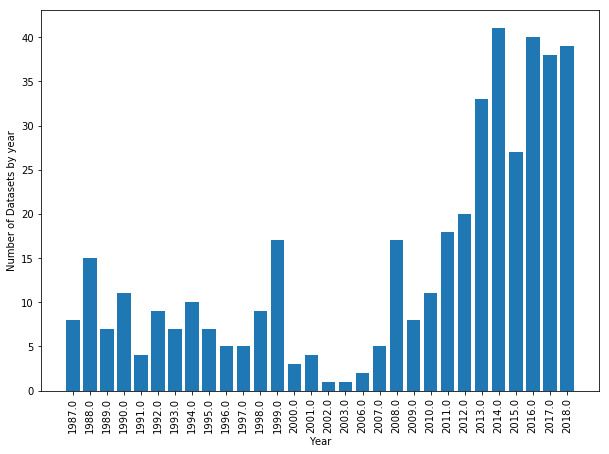

In [9]:
region =data.Year.value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets by year')
plt.xlabel('Year')
plt.show()

                                                  46
Causal-Discovery                                   4
Classification                                   242
Classification, Causal-Discovery                   2
Classification, Clustering                        44
Classification, Clustering, Causal-Discovery       2
Classification, Regression                        29
Classification, Regression, Clustering            13
Classification, Regression, Clustering, Causa      1
Clustering                                        14
Clustering, Causal-Discovery                       1
Function-Learning                                  1
Recommendation                                     1
Recommender-Systems                                2
Regression                                        42
Regression, Classification                         1
Regression, Clustering                             3
Regression, Clustering, Causal-Discovery           2
Regression, Description                       

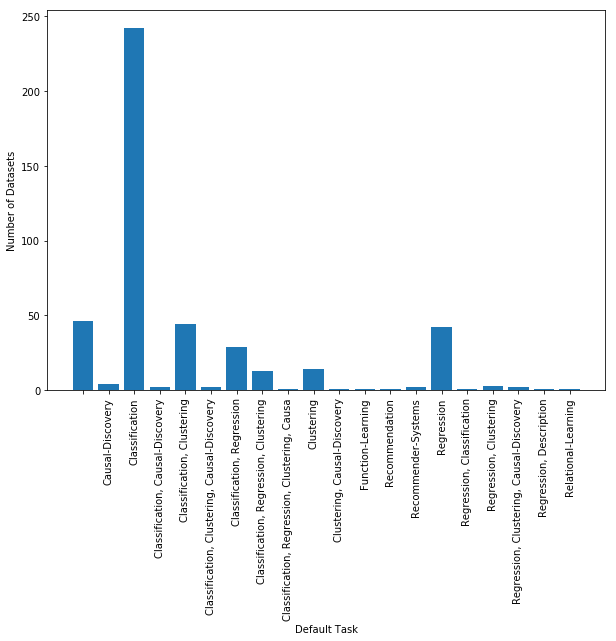

In [17]:
region =data['Default Task'].value_counts().sort_index()
print(region)
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('Default Task')
plt.show()

Categorical                    38
Categorical, Integer           28
Categorical, Integer, Real     20
Categorical, Real               6
Categorical, Real, Integer      1
Integer                        73
Integer, Real                  60
Real                          159
Name: Attribute Types, dtype: int64


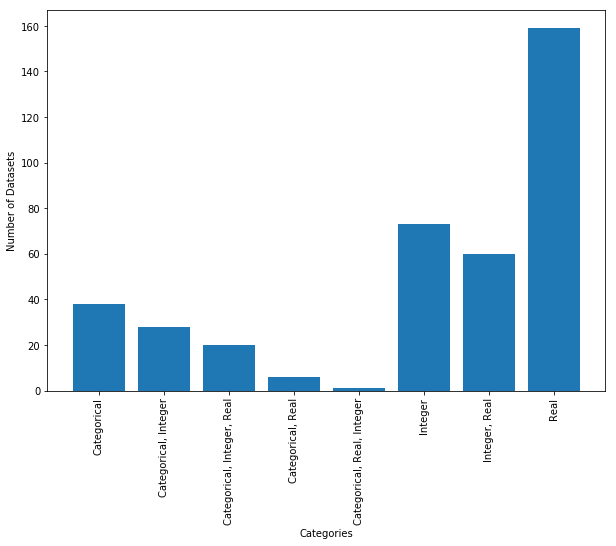

In [245]:
region =data['Attribute Types'].value_counts().sort_index()
print region
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('Categories')
plt.show()

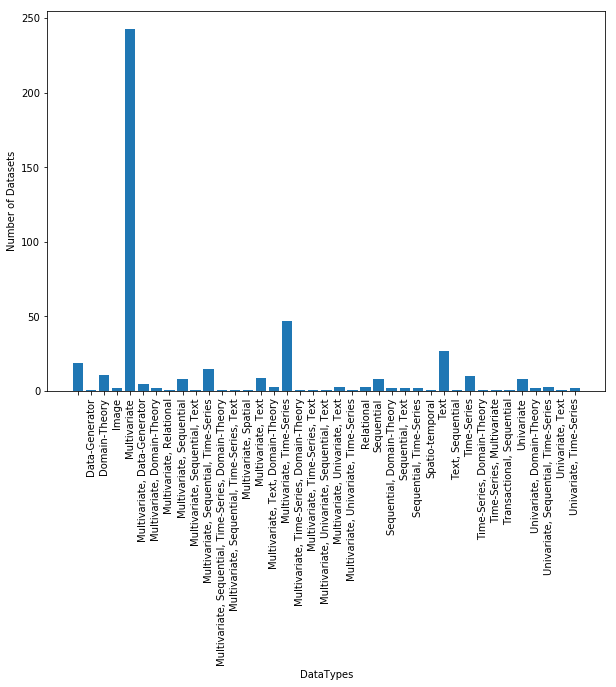

In [20]:
region =data['Data Types'].value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('DataTypes')
plt.show()